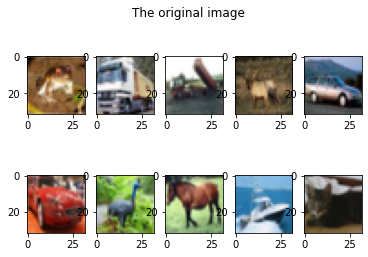

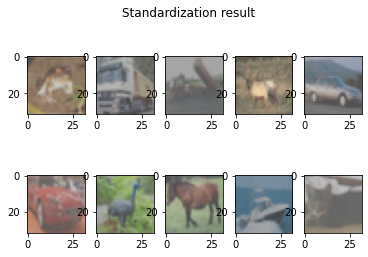

In [4]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle("The original image", fontsize=12)
plt.show()

# Generator 생성
datagen = ImageDataGenerator(samplewise_center=True,
                             samplewise_std_normalization=True)

# 표준화
g = datagen.flow(X_train, y_train, shuffle=False)
X_batch, y_batch = g.next()


X_batch *= 127.0 / max(abs(X_batch.min()), X_batch.max())
X_batch += 127.0
X_batch = X_batch.astype('uint8')

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle("Standardization result", fontsize=12)
plt.show()

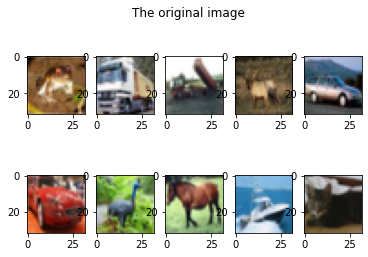

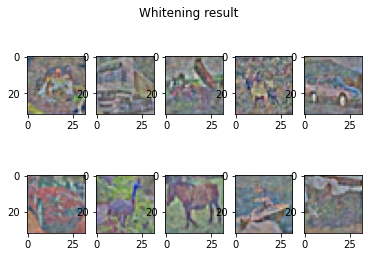

In [7]:
X_train = X_train[:300]
X_test = X_test[:100]
y_train = y_train[:300]
y_test = y_test[:100]

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
plt.suptitle("The original image", fontsize=12)
plt.show()

# Generator 생성
datagen = ImageDataGenerator(zca_whitening=True)

# 백색화
datagen.fit(X_train)
g = datagen.flow(X_train, y_train, shuffle=False)
X_batch, y_batch = g.next()

X_batch *= 127.0 / max(abs(X_batch.min()), abs(X_batch.min()))
X_batch += 127
X_batch = X_batch.astype("uint8")

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_batch[i])
plt.suptitle("Whitening result", fontsize=12)
plt.show()

Epoch 1/3
10/10 [==============================] - 1s 20ms/step - loss: 2.3728 - accuracy: 0.1033 - val_loss: 2.3018 - val_accuracy: 0.1433
Epoch 2/3
10/10 [==============================] - 0s 8ms/step - loss: 2.2124 - accuracy: 0.2333 - val_loss: 2.2091 - val_accuracy: 0.2367
Epoch 3/3
10/10 [==============================] - 0s 8ms/step - loss: 2.1168 - accuracy: 0.4033 - val_loss: 2.1626 - val_accuracy: 0.4033


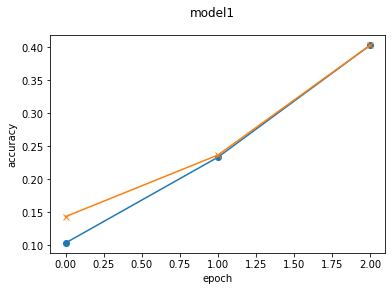

Epoch 1/3
10/10 [==============================] - 1s 26ms/step - loss: 1.7621 - accuracy: 0.4200 - val_loss: 2.6651 - val_accuracy: 0.4900
Epoch 2/3
10/10 [==============================] - 0s 11ms/step - loss: 0.7047 - accuracy: 0.8200 - val_loss: 1.6376 - val_accuracy: 0.5267
Epoch 3/3
10/10 [==============================] - 0s 11ms/step - loss: 0.3893 - accuracy: 0.9300 - val_loss: 1.3450 - val_accuracy: 0.6233


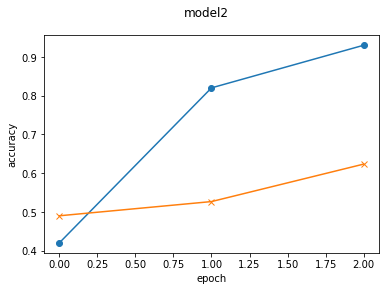

In [12]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = np.reshape(a=X_train, newshape=(-1, 28, 28, 1))[:300]
X_test = np.reshape(a=X_test, newshape=(-1, 28, 28, 1))[:300]
y_train = to_categorical(y_train)[:300]
y_test = to_categorical(y_test)[:300]

# sigmoid를 활성화 함수로 사용하는 모델 정의
model1 = Sequential()
model1.add(Conv2D(input_shape=(28, 28, 1), filters=32,
           kernel_size=(2, 2), strides=(1, 1), padding="same"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=32, kernel_size=(2, 2),
                  strides=(1, 1), padding="same"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(256))
model1.add(Activation("sigmoid"))
model1.add(Dense(128))
model1.add(Activation("sigmoid"))
model1.add(Dense(10))
model1.add(Activation("softmax"))

# 컴파일
model1.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
# 학습
history = model1.fit(X_train, y_train, batch_size=32, epochs=3, validation_data=(X_test, y_test))
# 시각화
plt.plot(history.history["accuracy"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_accuracy"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.suptitle("model1", fontsize=12)
plt.show()

# ReLU를 활성화 함수로 사용하는 모델 정의
model2 = Sequential()
model2.add(Conv2D(input_shape=(28, 28, 1), filters=32,
                 kernel_size=(2, 2), strides=(1, 1), padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=32, kernel_size=(
    2, 2), strides=(1, 1), padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(256))
model2.add(Activation("relu"))
# 배치 정규
model2.add(BatchNormalization())
model2.add(Dense(128))
model2.add(Activation("relu"))
# 배치 정규화
model2.add(BatchNormalization())
model2.add(Dense(10))
model2.add(Activation("softmax"))

# 컴파일
model2.compile(optimizer="sgd", loss="categorical_crossentropy",
              metrics=["accuracy"])
# 학습
history = model2.fit(X_train, y_train, batch_size=32, epochs=3, 
                     validation_data=(X_test, y_test))

# 시각화
plt.plot(history.history["accuracy"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_accuracy"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.suptitle("model2", fontsize=12)
plt.show()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

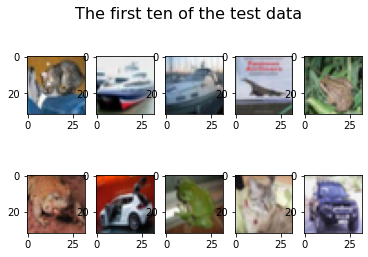

1/1 [==============================] - 1s 1s/step
[3 8 8 9 6 6 7 6 3 3]


In [17]:
# 전이학습
from keras import optimizers
from keras.layers import Dropout, Input
from keras.models import Model
from keras.applications.vgg16 import VGG16

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

input_tensor = Input(shape=(32, 32, 3))

vgg16 = VGG16(include_top=False, weights="imagenet", input_tensor=input_tensor)

top_model = vgg16.output
top_model = Flatten(input_shape=vgg16.output_shape[1:])(top_model)
top_model = Dense(256, activation="sigmoid")(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(10, activation="softmax")(top_model)

# vgg16과 top_model 연결
model = Model(inputs=vgg16.input, outputs=top_model)

# 19층째까지의 가중치 고정
for layer in model.layers[:19]:
    layer.trainable = False

model.summary()

model.compile(loss="categorical_crossentropy",
               optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
               metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=3)
print(f"Val accuracy: {history.history['val_accuracy']}")
model.save_weights("param_vgg.hdf5")

scores = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {scores[0]}")
print(f"Test Accuracy: {scores[1]}")

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
plt.suptitle("The first ten of the test data", fontsize=16)
plt.show()

pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)

In [20]:
import tensorflow as tf
print("CPU를 사용한 학습")
with tf.device("/device:CPU:0"):
    model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=1)
print("GPU를 사용한 학습")
with tf.device("/device:GPU:0"):
    model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=2)

CPU를 사용한 학습
1563/1563 [==============================] - 113s 72ms/step - loss: 1.6105 - accuracy: 0.4346 - val_loss: 1.4418 - val_accuracy: 0.4974
GPU를 사용한 학습
Epoch 1/2
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5565 - accuracy: 0.4523 - val_loss: 1.4089 - val_accuracy: 0.5082
Epoch 2/2
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5140 - accuracy: 0.4666 - val_loss: 1.3847 - val_accuracy: 0.5169
